Notes inspired from the popular book "Machine Learning for Financial Risk with Python" by Abdullah Karasan

- Credit risk arises when a borrower is not able to pay the debt.
- causes losses for financial institution
- *Basel* closely monitors recent development in financial markets and sets regulation to strengthen bank capital requirements

- *Basel III 2010* suggest banks to implement either a standardized approach or an internal ratings-based (IRB) approach to estimate credit risk. 
### IRB approach
Key parameters
- Expected loss = EAD x LGD x PD
- PD: probability of default, LGD: loss given default (0-1), EAD: exposure at default

- Most challenging part of credit risk: PD

___Risk bucketing___
- grouping borrowers with similar creditworthiness
- create homogeneous groups/clusters to better estimate credit risk
- clustering using K-means

__German Credit Risk Dataset__
- Downloaded from : http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data


In [1]:
import pandas as pd
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",sep=" ",header=None)

In [2]:
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Risk"]
df.columns = headers

In [3]:
#for structuring only
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)



Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)




Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)




Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)



foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)



risk={1:"Good Risk", 2:"Bad Risk"}
df["Risk"]=df["Risk"].map(risk)

In [4]:
# Let us pull out features to be used in the study
df = df[['Age in years', 'Credit history','Duration in month', 'Credit amount', 'Risk']]
df.to_csv("german_credit_trimmed.csv",index=False) #save as csv file


In [51]:
df.describe()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Age in years,Credit history,Duration in month,Credit amount,Risk,clusters
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.45500,20.903000,3271.258000,0.700000,0.233000
std,11.375469,1.08312,12.058814,2822.736876,0.458487,0.422954
min,19.000000,0.00000,4.000000,250.000000,0.000000,0.000000
25%,27.000000,0.00000,12.000000,1365.500000,0.000000,0.000000
50%,33.000000,2.00000,18.000000,2319.500000,1.000000,0.000000
75%,42.000000,2.00000,24.000000,3972.250000,1.000000,0.000000
max,75.000000,4.00000,72.000000,18424.000000,1.000000,1.000000


In [52]:
# Create a label encode for the categorical variable
# Risk is the target variable
# A rough glance at the label_ch suggest higher values are desired by the lender (banks)
label_ch = {"critical account":0,"delay in paying off":1,"existing credits paid back duly till now":2,\
                 "all credits at this bank paid back duly":3,"no credits taken":4}

df["Credit history"]=df["Credit history"].map(label_ch)
# df['Credit history'] = label_encoder.fit_transform(df['Credit history'])

label_risk ={"Good Risk":1, "Bad Risk":0}
df['Risk'] = df['Risk'].map(label_risk)


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [7]:
df

,Age in years,Credit history,Duration in month,Credit amount,Risk
0,67,0,6,1169,1
1,22,2,48,5951,0
2,49,0,12,2096,1
3,45,2,42,7882,1
4,53,1,24,4870,0
...,...,...,...,...,...
995,31,2,12,1736,1
996,40,2,30,3857,1
997,38,2,12,804,1
998,23,2,45,1845,0


Let us do some Interpretable ML exercises using PiML. 

In [8]:
from piml import Experiment

exp = Experiment()
exp.data_loader(data=df)

,Age in years,Credit history,Duration in month,Credit amount,Risk
0,67.0,0.0,6.0,1169.0,1.0
1,22.0,2.0,48.0,5951.0,0.0
2,49.0,0.0,12.0,2096.0,1.0
3,45.0,2.0,42.0,7882.0,1.0
4,53.0,1.0,24.0,4870.0,0.0
...,...,...,...,...,...
995,31.0,2.0,12.0,1736.0,1.0
996,40.0,2.0,30.0,3857.0,1.0
997,38.0,2.0,12.0,804.0,1.0
998,23.0,2.0,45.0,1845.0,0.0


In [9]:
from piml.models import GLMClassifier, ExplainableBoostingClassifier, XGB1Classifier, XGB2Classifier
exp.data_prepare(target="Risk", task_type="classification", silent=True)


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [10]:
exp.feature_select()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [11]:
exp.model_train(GLMClassifier(), name="GLM")
exp.model_train(ExplainableBoostingClassifier(), name="EBM")
exp.model_train(XGB2Classifier(), name="XGB2")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [12]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [13]:
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [14]:
exp.model_compare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Let us move on to calculate __Probability of default__ (the chances that the borrower is not paying the loan) using various ML techniques.

In [15]:
# Dropping "Risk" because it is the target variable
numerical_credit = df.drop('Risk', axis=1)
numerical_credit

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Age in years,Credit history,Duration in month,Credit amount
0,67,0,6,1169
1,22,2,48,5951
2,49,0,12,2096
3,45,2,42,7882
4,53,1,24,4870
...,...,...,...,...
995,31,2,12,1736
996,40,2,30,3857
997,38,2,12,804
998,23,2,45,1845


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

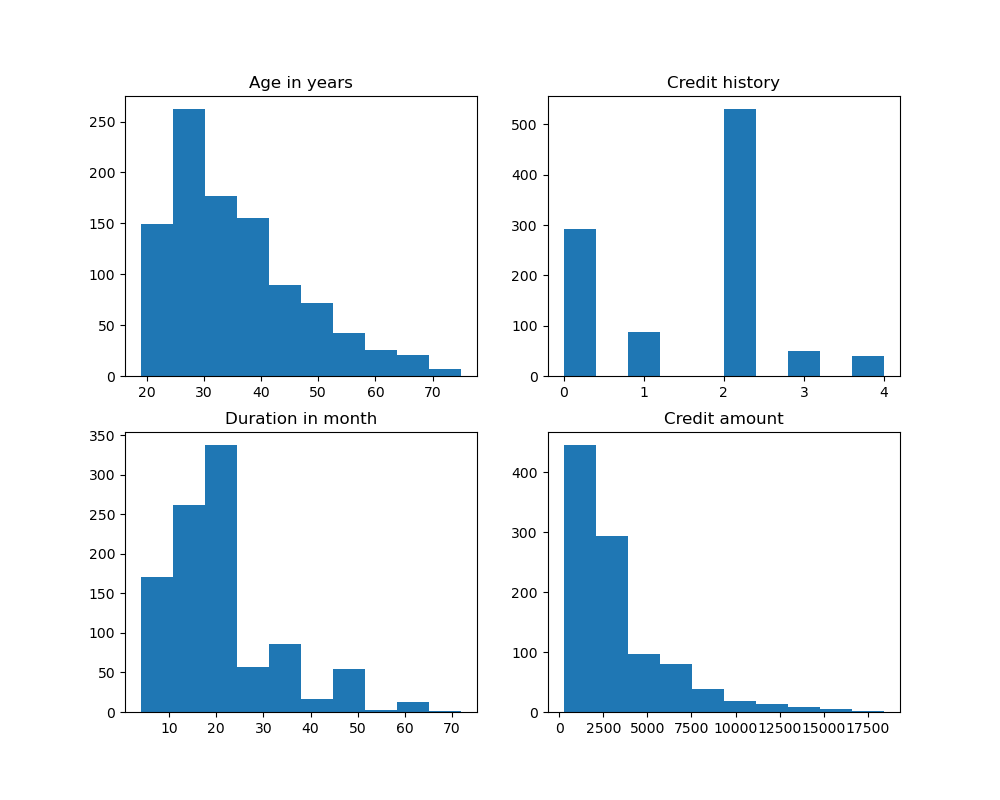

In [16]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,8))
k = 0
cols = numerical_credit.columns
for i,j in zip(range(len(cols)), cols):
    k +=1 
    plt.subplot(2,2,k)
    plt.hist(numerical_credit.iloc[:,i])
    plt.title(j)

- does not follow normal distribution
- positively skewed

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

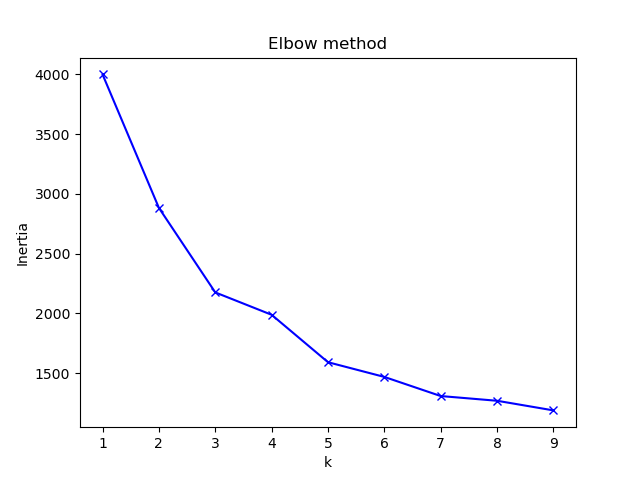

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

distance = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)
    
plt.plot(range(1,10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

- Curve gets flatter after 4 cluseters
- Stop at 4 clusters

__Silhouette Scores__

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

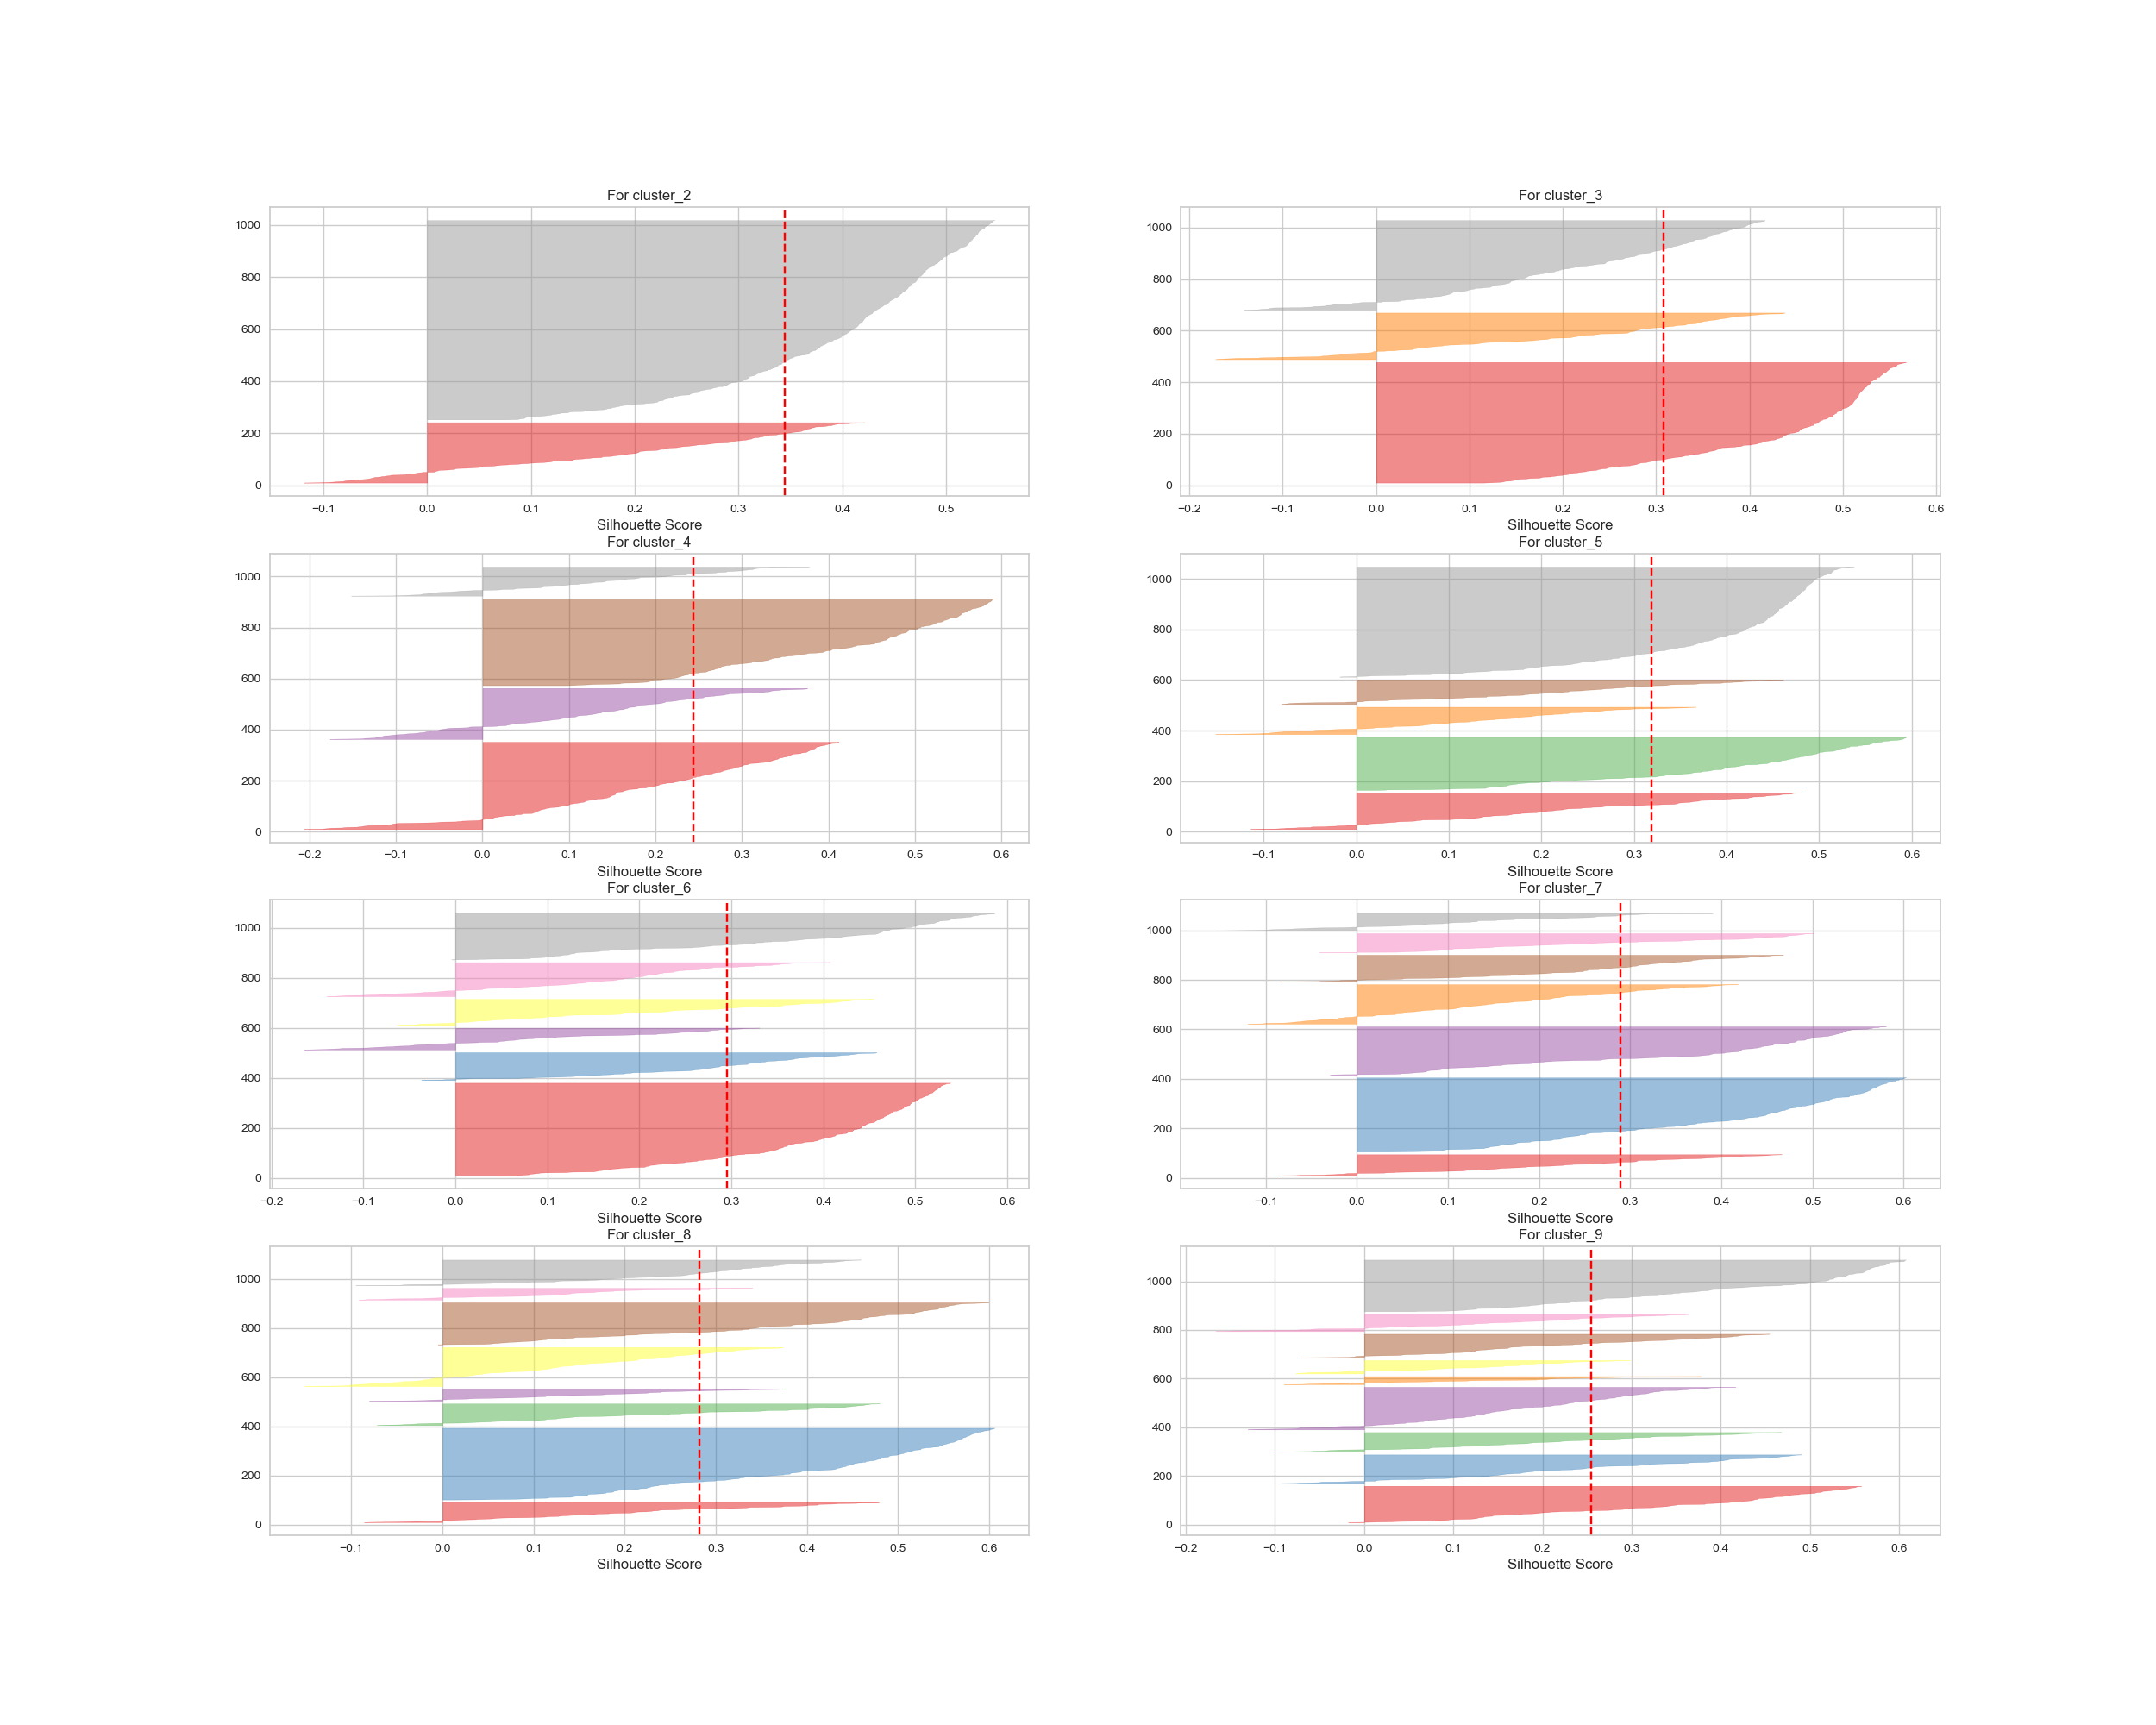

In [18]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4,2,figsize=(25,20))

for i in range(2,10):
    km = KMeans(n_clusters=i, n_init='auto')
    q, r = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, color='yellowbrick',\
                                     ax=ax[q-1][r])
    visualizer.fit(scaled_credit)
    ax[q-1][r].set_title('For cluster_'+str(i))
    ax[q-1][r].set_xlabel('Silhouette Score')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

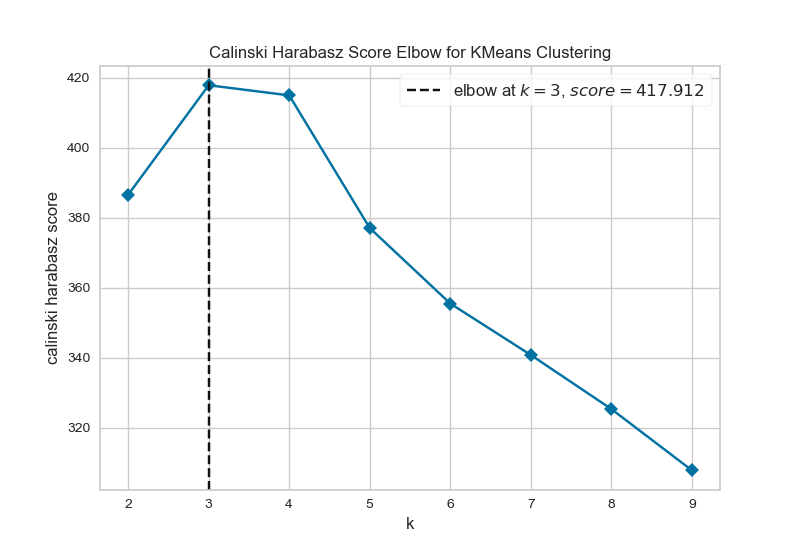

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer=KElbowVisualizer(model, k=(2,10), \
                            metric='calinski_harabasz',\
                           timings=False)
visualizer.fit(scaled_credit)
visualizer.show()

- This shows that the elbow occurs at the second cluster
- stopping at two clusters is the optimum decision
- The last step: GAP analysis

In [20]:
from gap_statistic.optimalK import OptimalK
optimalK = OptimalK(n_jobs=8, parallel_backend='joblib')
n_clusters = optimalK(scaled_credit, cluster_array=np.arange(1,10))

gap_result = optimalK.gap_df
gap_result.head()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,n_clusters,gap_value,ref_dispersion_std,sk,gap*,sk*,diff,diff*
0,1.0,0.837618,138.749712,0.017422,5244.469093,6057.910261,0.097352,5824.310175
1,2.0,0.776335,215.641356,0.036069,3701.303915,4281.144997,-0.140692,4214.354208
2,3.0,0.925458,40.021025,0.008431,3314.605894,3827.656187,0.067990,3728.372356
3,4.0,0.859404,7.770990,0.001935,2674.544187,3088.310649,-0.087629,3080.984171
4,5.0,0.971206,87.649847,0.024173,2616.313704,3022.753688,0.051217,2980.412862


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Gap')

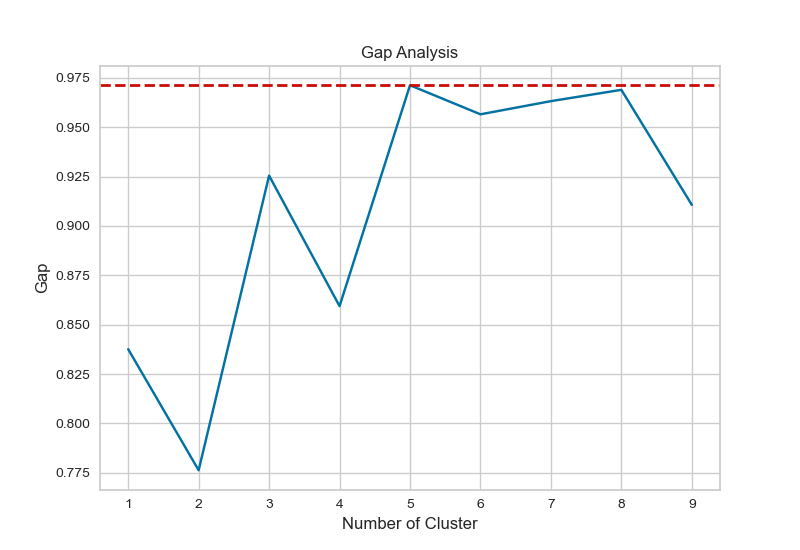

In [21]:
plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r', linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap')


- Want to divide the total pool of borrowers into two groups/clusters 
- Division will be based on the features using the KMeans algorithm
- End product of KMeans
    - Two groups of borrowers
    - Both will have certain fraction of borrowers with "Good Risk" and "Bad Risk"
- Why model different clusters?
    - There could be a group of borrowers who differ from other group of borrowers.
    - For e.g. there may be borrowers that differ in terms of credit amount, or their credit histories

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

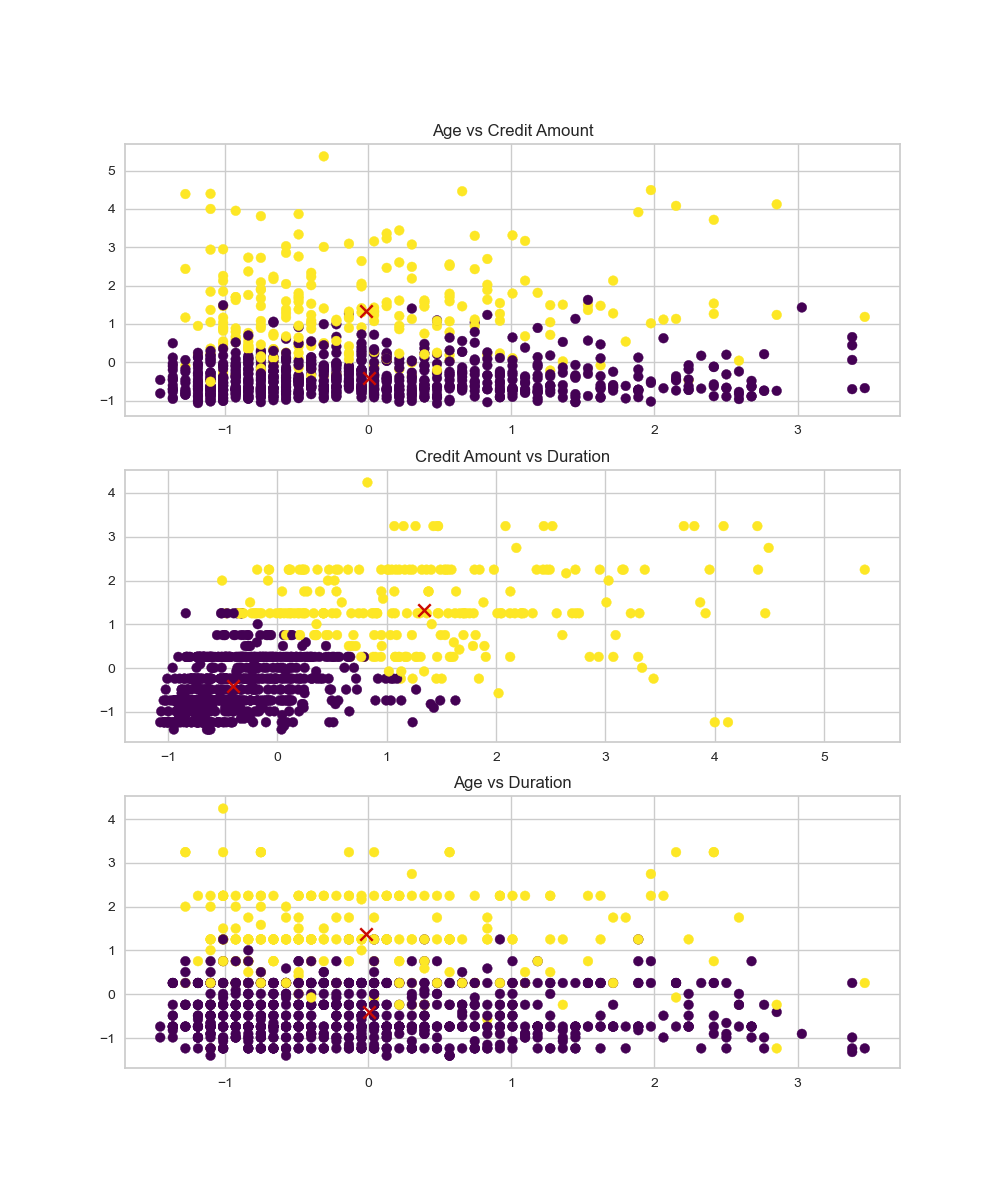

In [22]:
kmeans = KMeans(n_clusters=2, n_init='auto')
clusters = kmeans.fit_predict(scaled_credit)

plt.figure(figsize=(10,12))
plt.subplot(311)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 3],\
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],\
            kmeans.cluster_centers_[:, 3], s = 80,\
            marker= 'x', color = 'r')
plt.title('Age vs Credit Amount')
plt.subplot(312)
plt.scatter(scaled_credit[:, 3], scaled_credit[:, 2],\
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 3],\
            kmeans.cluster_centers_[:, 3], s = 80,\
            marker= 'x', color = 'r')
plt.title('Credit Amount vs Duration')
plt.subplot(313)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],\
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],\
            kmeans.cluster_centers_[:, 2], s = 80,\
            marker= 'x', color = 'r')
plt.title('Age vs Duration')
plt.show()

## PD Estimation with LogisticRegression
- Proposes a regression approach to the classification problem
- seeks to predict discrete output taking into account some independent variables

__Class imbalance__
- In credit risk analysis, it is uncommon to have a _class imbalance_ 
- _class imbalance_: one class dominates over other (for e.g. no. of burrowers with low risk outweigh those with high risk or vice-versa)
- various remedies
    - up-sampling, down-sampling
    - synthetic minority oversampling technique (SMOTE)
    - edit nearest neighbor (ENN)

In [49]:
clusters, counts = np.unique(kmeans.labels_, return_counts=True)
clusters_dict = {}
for i in range(len(clusters)):
    clusters_dict[i] = scaled_credit[np.where(kmeans.labels_==i)]

# Add a new column that states what cluster the sample belongs to
df['clusters'] = pd.DataFrame(kmeans.labels_)

df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = df['clusters']

df_scaled['Risk'] = df['Risk']
df_scaled.columns = ['Age','Credit History', 'Duration', 'Credit amount', 'Clusters','Risk']
df_scaled.describe()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Age,Credit History,Duration,Credit amount,Clusters,Risk
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,5.329071e-17,3.730349e-17,1.136868e-16,6.661338e-17,0.233000,0.700000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.422954,0.458487
min,-1.455261e+00,-1.344014e+00,-1.402415e+00,-1.070865e+00,0.000000,0.000000
25%,-7.516417e-01,-1.344014e+00,-7.386675e-01,-6.754833e-01,0.000000,0.000000
50%,-2.239269e-01,5.034280e-01,-2.408572e-01,-3.373443e-01,0.000000,1.000000
75%,5.676451e-01,5.034280e-01,2.569531e-01,2.484620e-01,0.000000,1.000000
max,3.470076e+00,2.350870e+00,4.239436e+00,5.370789e+00,1.000000,1.000000


In [24]:
# Number of "Good Risk" and "Bad Risk" borrowers in Cluster 0 (or the first cluster)
df_scaled[df_scaled.Clusters==0]['Risk'].value_counts()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Risk
1    569
0    198
Name: count, dtype: int64

In [38]:
# Number of "Good Risk" and "Bad Risk" borrowers in Cluster 1 (or the second cluster)
df_scaled[df_scaled.Clusters==1]['Risk'].value_counts()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Risk
1    131
0    102
Name: count, dtype: int64

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

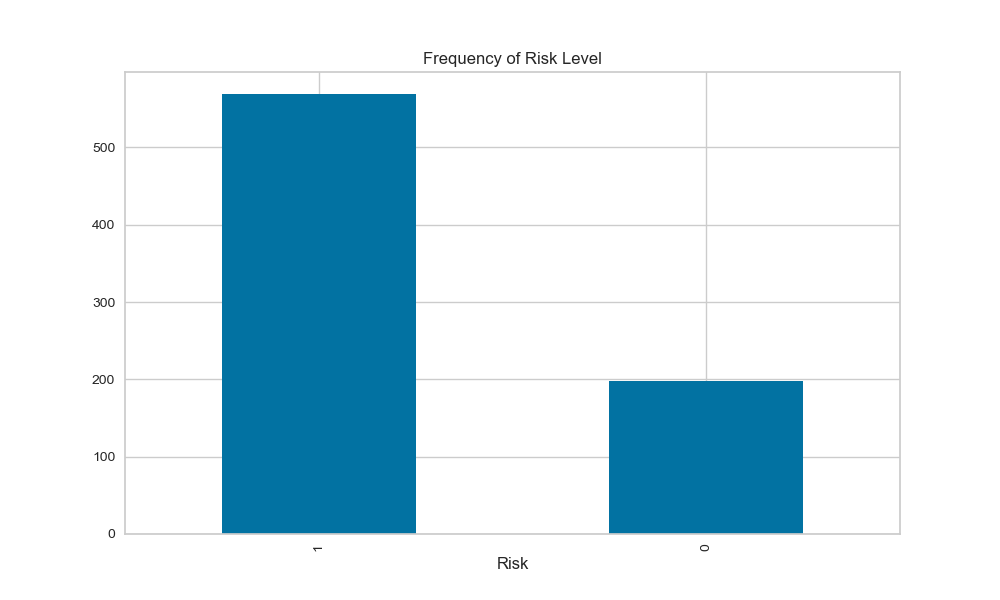

In [39]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts().plot(kind='bar',\
                            figsize=(10, 6),title="Frequency of Risk Level");


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

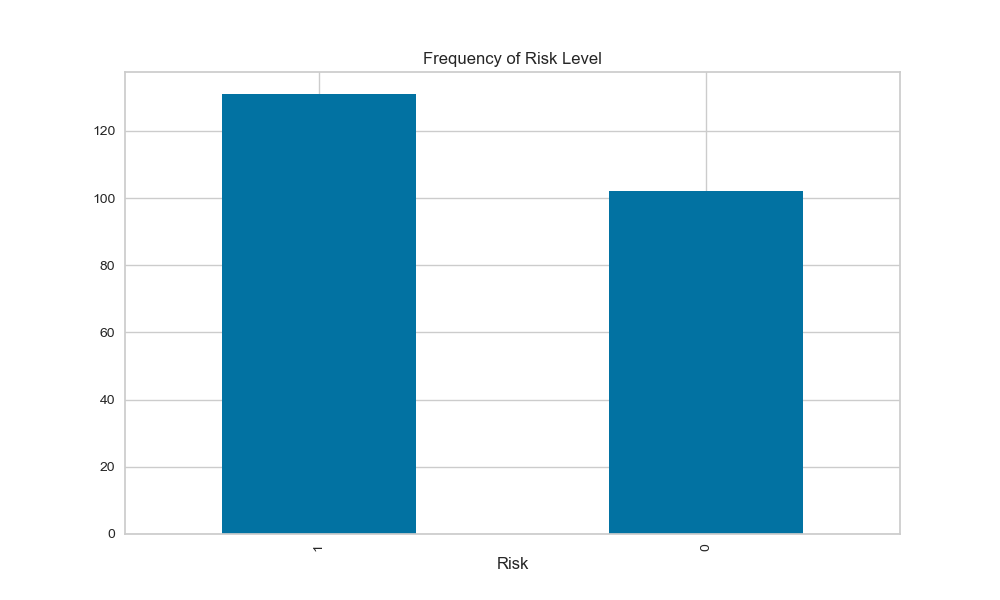

In [40]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts().plot(kind='bar',
                            figsize=(10, 6),title="Frequency of Risk Level");

- Cluster 0 has a greater class imbalance compared to Cluster 1

In [44]:
from sklearn.model_selection import train_test_split

# Select your feature space (remove target variable)
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:,['Risk','Clusters']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Define training sets in each cluster: Also make sure the 'Clusters' column is removed
first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1] 
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1] 


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [53]:
print("There are ",len(first_cluster_train), " training examples in Cluster 0.")
print("There are ",len(second_cluster_train), " training examples in Cluster 1.")

print("See what the total number of training example is. Is it 80% of the total example?")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

There are  607  training examples in Cluster 0.
There are  193  training examples in Cluster 1.
See what the total number of training example is. Is it 80% of the total example?


__Training a Logistic Regression for Cluster 0__

In [54]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

X_train1 = first_cluster_train
y_train1 = y_train[y_train.Clusters==0]['Risk']
smoteenn = SMOTEENN(random_state=50)
X_train1, y_train1 = smoteenn.fit_resample(X_train1, y_train1.ravel())
logit = sm.Logit(y_train1, X_train1)
logit_fit1 = logit.fit()
print(logit_fit1.summary())

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.462695
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  469
Model:                          Logit   Df Residuals:                      465
Method:                           MLE   Df Model:                            3
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.3313
Time:                        14:20:34   Log-Likelihood:                -217.00
converged:                       True   LL-Null:                       -324.52
Covariance Type:            nonrobust   LLR p-value:                 2.376e-46
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                0.2665      0.130      2.052      0.040       0.012       0.521
Credit History   

__Understanding the summary__
- Age and Credit amount have +ve coef: rise in Age and Credit amount imply a higher PD
- Credit History and Duration have -ve coef: slide in Credit History and Duration imply higher PD 
    - shorter duration loans have higher PD
    - bad credit history has higher PD
__Interpreation of coef__
- Let us look at 0.2665 for the age
    - odds ratio = exp(0.2665) = 1.305
    - one unit increase in Age, the PD increases by 30.5 %
    - does not mean the difference in PD between 45 yr and 46 yr old borrower (with other variables same) is 30.5% because the Age variable is scaled
    - mean = 35.54, std = 11.37
    - Since unit increase in scaled age = 35.54+11.37 years, the PD of a borrower 47 yrs older than another borrower, with the same set of other variables, is 30.5% higher.
    

In [55]:
first_cluster_test = X_test[X_test.Clusters==0].iloc[:,:-1]
second_cluster_test = X_test[X_test.Clusters==1].iloc[:,:-1]

X_test1 = first_cluster_test
y_test1 = y_test[y_test.Clusters == 0]['Risk']
pred_prob1 = logit_fit1.predict(X_test1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

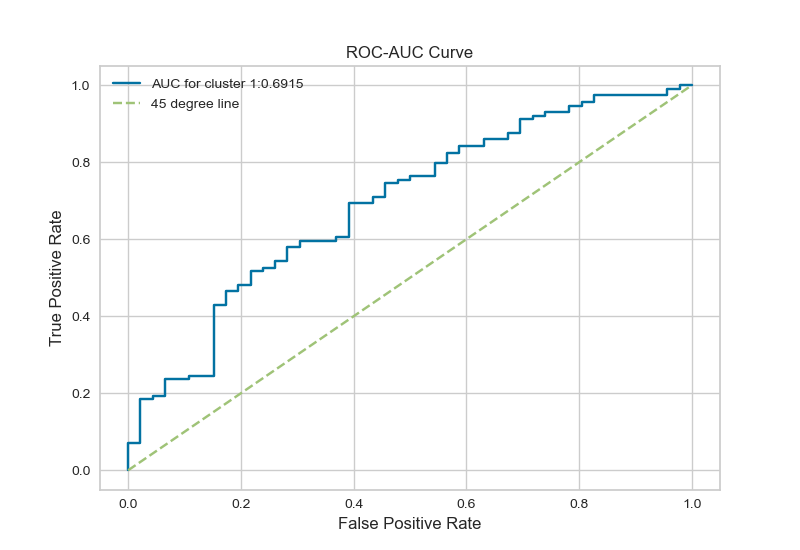

In [56]:
false_pos, true_pos, _ = roc_curve(y_test1.values, pred_prob1)
auc = roc_auc_score(y_test1, pred_prob1)
plt.plot(false_pos, true_pos, label='AUC for cluster 1:{:.4f}'.format(auc))
plt.plot([0,1],[0,1], linestyle='--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC (Receiver Operating Characteristic) Curve
- plot of TP rate against FP rate across different classification thresholds
-  45-degree line represents a random guess
Area Under the Curve (AUC)
- AUC is the area under the ROC curve
- ranges from 0 to 1
- 0.5: random model, 1.0: perfect model
- higher AUC means better model in terms of its ability to distinguish between positive and negative samples

Let us repeat this ROC-AUC for the second cluster

In [57]:
X_train2 = second_cluster_train
y_train2 = y_train[y_train.Clusters==1]['Risk']
smoteenn = SMOTEENN(random_state=50)
X_train2, y_train2 = smoteenn.fit_resample(X_train2, y_train2.ravel())
logit = sm.Logit(y_train2, X_train2)
logit_fit2 = logit.fit()
print(logit_fit2.summary())

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.513150
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   54
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                            3
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                  0.2589
Time:                        20:15:38   Log-Likelihood:                -27.710
converged:                       True   LL-Null:                       -37.393
Covariance Type:            nonrobust   LLR p-value:                 0.0002297
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                0.1644      0.452      0.364      0.716      -0.721       1.050
Credit History   

- Note how the coefficients are different comapared to the first cluster. 
- Also because the P>|z| are large for three out of four, the estimated coeff are statistically insignificant at 95% confidence level
- So don't interpret the results further

In [58]:
X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters==1]['Risk']
pred_prob2 = logit_fit2.predict(X_test2)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

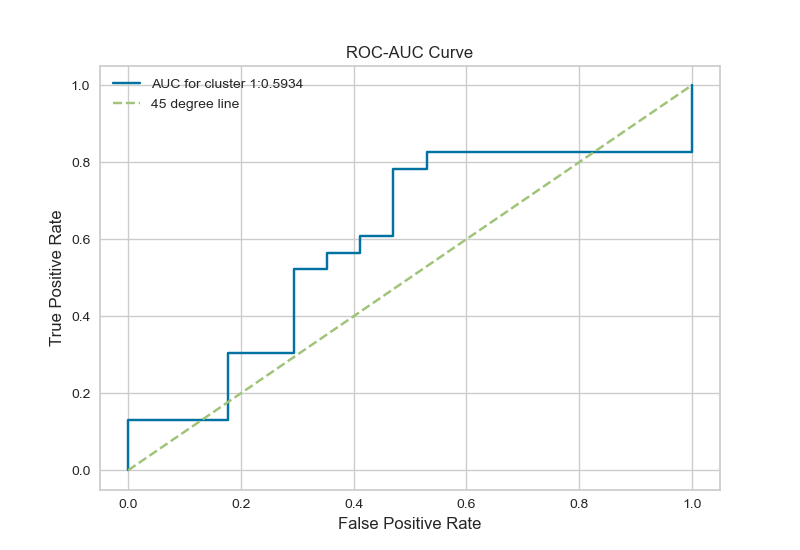

In [34]:
false_pos, true_pos, _ = roc_curve(y_test2.values, pred_prob2)
auc = roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos, true_pos, label='AUC for cluster 1:{:.4f}'.format(auc))
plt.plot([0,1],[0,1], linestyle='--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The AUC score for both the clusters suggest that the logistic regression is not doing a good at modeling PD for the German credit data.
## PD Estimation with a Bayesain Model

__Calculation for Cluster 0__

In [35]:
import arviz as az
import pymc3 as pm

with pm.Model() as logistic_model1:
    beta_age = pm.Normal('coeff_age', mu=0, sd=10)
    beta_history = pm.Normal('coeff_credit_history', mu=0, sd=10)
    beta_credit = pm.Normal('coeff_credit_amount', mu=0, sd=10)
    beta_dur = pm.Normal('coeff_duration', mu=0, sd=10)
    p = pm.Deterministic('p', pm.math.sigmoid(beta_age * X_train1['Age'] + beta_history * X_train1['Credit History']+\
                                             beta_credit * X_train1['Credit amount'] + beta_dur * X_train1['Duration']))

with logistic_model1:
    observed = pm.Bernoulli("Risk", p, observed=y_train1)
    map_estimate = pm.find_MAP()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [36]:
param_list = ['coeff_age','coeff_credit_history','coeff_credit_amount','coeff_duration']
params= {}
for i in param_list:
    params[i] = [np.round(map_estimate[i],6)]

bayesian_params = pd.DataFrame.from_dict(params)
print('The result of Bayesian estimation:\n {}'.format(bayesian_params))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

The result of Bayesian estimation:
    coeff_age  coeff_credit_history  coeff_credit_amount  coeff_duration
0    0.26652             -1.372969             0.913061       -1.342617


- coefficients estimated by Logistic Regression and Bayesian model are almost the same.

__Calculation for Cluster 1__

In [ ]:
with pm.Model() as logistic_model2:
    beta_age = pm.Normal('coeff_age', mu=0, sd=10)
    beta_history = pm.Normal('coeff_credit_history', mu=0, sd=10)
    beta_credit = pm.Normal('coeff_credit_amount', mu=0, sd=10)
    beta_dur = pm.Normal('coeff_duration', mu=0, sd=10)
    p = pm.Deterministic('p', pm.math.sigmoid(beta_age * X_train2['Age'] + beta_history * X_train2['Credit History']+\
                                             beta_credit * X_train2['Credit amount'] + beta_dur * X_train2['Duration']))

with logistic_model2:
    observed = pm.Bernoulli("Risk", p, observed=y_train2)
    map_estimate = pm.find_MAP()

In [ ]:
param_list = ['coeff_age','coeff_credit_history','coeff_credit_amount','coeff_duration']
params= {}
for i in param_list:
    params[i] = [np.round(map_estimate[i],6)]

bayesian_params = pd.DataFrame.from_dict(params)
print('The result of Bayesian estimation:\n {}'.format(bayesian_params))

- same story for Cluster 1

- Instead of finding the local maximum, we look ofr an approx expectation based on the sampling procedure
- called __Markov Chain Monte Carlo (MCMC)__. Uses Metropolis-Hastings algorithm 

In [ ]:
import logging
logger = logging.getLogger('pymc3')
logger.setLevel(logging.ERROR)

with logistic_model1:
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, progressbar=False)
    az.plot_trace(trace)
    plt.show()

In [ ]:
with logistic_model1:
    display(az.summary(trace, round_to=6)[:4])

## PD Estimation wiht Support Vector Machines
- parametric method

In [ ]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
params_svc ={'gamma': [1e-6,1e-2], \
            'C':[0.001,0.09,1,5,10],\
            'kernel':('linear','rbf')}

svc = SVC(class_weight='balanced')
halve_SVC = HalvingRandomSearchCV(svc, params_svc, scoring='roc_auc', n_jobs=-1)
halve_SVC.fit(X_train1, y_train1)
print('Best hyperparameters for Cluster 0 in SVC {} with {}'.format(halve_SVC.best_score_, halve_SVC.best_params_))

In [ ]:
y_pred_SVC1 = halve_SVC.predict(X_test1)
print('The ROC-AUC score is {:.4f}'.format(roc_auc_score(y_test1, y_pred_SVC1)))

__Calulation for Cluster 1__

In [ ]:
halve_SVC.fit(X_train2, y_train2)
print('Best hyperparameters for Cluster 0 in SVC {} with {}'.format(halve_SVC.best_score_, halve_SVC.best_params_))
y_pred_SVC2 = halve_SVC.predict(X_test2)
print('The ROC-AUC score is {:.4f}'.format(roc_auc_score(y_test2, y_pred_SVC2)))

- SVC is not doing a good job
- probably because the data is not clearly separable
- implies SVC does not work will with low-dimensional data
## Probability of Default Estimation using RF
- RF might outperform SVC because its prediction is better with large number of samples
- non-parametric: model with infinite number of parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=50)

param_rfc = {'n_estimators':[100,300],\
            'criterion':['gini','entropy'],\
            'max_features':['auto', 'sqrt', 'log2'],\
            'max_depth':[3,4,5,6],\
            'min_samples_split':[5,10]}

In [ ]:
halve_RF = HalvingRandomSearchCV(rfc, param_rfc, scoring='roc_auc', n_jobs=-1)
halve_RF.fit(X_train1,y_train1)
print('Best hyperparameters for Cluster 0 in RF {} with {}'.format(halve_RF.best_score_, halve_RF.best_params_))

In [ ]:
y_pred_RF1 = halve_RF.predict(X_test1)
print('The ROC-AUC score for Cluster 0 is {:.4f}'.format(roc_auc_score(y_test1, y_pred_RF1)))

In [ ]:
halve_RF.fit(X_train2, y_train2)
print('Best hyperparameters for Cluster 0 in RF {} with {}'.format(halve_RF.best_score_, halve_RF.best_params_))

In [ ]:
y_pred_RF2 = halve_RF.predict(X_test2)
print('The ROC-AUC score for Cluster 0 is {:.4f}'.format(roc_auc_score(y_test2, y_pred_RF2)))

## Probability of Default estimation with Neural Network

- PD estimation is complex, NN does a good job of unveiling hidden structure of the data
- GridSearchCV is used to optimize the no. of hidden layers, optimization technique, and learning rate

In [ ]:
from sklearn.neural_network import MLPClassifier

param_NN = {"hidden_layer_sizes":[(100,50),(50,50),(10,100)],\
           "solver":["lbfgs","sgd","adam"],\
           "learning_rate_init":[0.001, 0.05]}

MLP = MLPClassifier(random_state=50)
param_halve_NN = HalvingRandomSearchCV(MLP, param_NN, scoring='roc_auc')
param_halve_NN.fit(X_train1, y_train1)
print('Best hyperparameter for Cluster 0 in NN are {}'.format(param_halve_NN.best_params_))

In [ ]:
y_pred_NN1 = param_halve_NN.predict(X_test1)
print('ROC-AUC for Cluster 0 is {:.4f} '.format(roc_auc_score(y_test1, y_pred_NN1)))

In [ ]:
param_halve_NN.fit(X_train2, y_train2)
print('Best hyperparameter for Cluster 0 in NN are {}'.format(param_halve_NN.best_params_))
y_pred_NN2 = param_halve_NN.predict(X_test2)
print('ROC-AUC for Cluster 0 is {:.4f} '.format(roc_auc_score(y_test2, y_pred_NN2)))

## Probability of Default using Deep Learning
- using KerasClassifier from Tensorflow

In [ ]:
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

def DL_risk():
    model = keras.Sequential()
    model.add(Dense(128, kernel_initializer='normal', activation='relu', input_dim=4 ))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop')
    return model

In [ ]:
parameters = {'batch_size':[10,50,100],'epochs':[50,100,150]}#, 'dropout_rate':[0.2,0.4]}
model = KerasClassifier(build_fn=DL_risk)
gs = GridSearchCV(estimator=model, param_grid=parameters, scoring='roc_auc')


In [ ]:
gs.fit(X_train1, y_train1, verbose=0)
print('Best hyperparameters for Cluster O in DL are {}'.format(gs.best_params_))

In [ ]:
model = KerasClassifier(build_fn=DL_risk, verbose=0, batch_size = gs.best_params_['batch_size'],\
                            epochs=gs.best_params_['epochs'])
model.fit(X_train1, y_train1)
DL_predict1 = model.predict(X_test1)
DL_ROC_AUC = roc_auc_score(y_test1, DL_predict1)

In [ ]:
print('ROC-AUC is {:.4f}'.format(DL_ROC_AUC))